In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

## Loading our Saved Model

In [6]:
import tensorflow as tf
from tensorflow.keras.models import load_model

# Define the path to your saved model
model_path = '/content/drive/My Drive/Emotion_model/DeepS_emotion_model.keras'

# Load the model
try:
    loaded_model = load_model(model_path)
    print("Model loaded successfully.")
except Exception as e:
    print(f"Error loading model: {e}")

Model loaded successfully.


In [167]:
file_path = '/content/drive/My Drive/Emotion_model/Sample_Images/Vlad.png'

In [168]:

if os.path.exists(file_path):
    print("File exists on disk. Proceeding to check if it's readable.")
else:
    print("File does NOT exist. Please re-check the path or upload the file.")

File exists on disk. Proceeding to check if it's readable.


In [169]:

# 1. Load the image in grayscale
new_image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

if new_image is not None:
    # 2. Resize the image to match your model's input size (e.g., 48x48)
    resized_image = cv2.resize(new_image, (48, 48))

    # 3. Reshape the image to add the channel and batch dimensions
    # For a grayscale image, the shape should be (1, 48, 48, 1)
    reshaped_image = np.expand_dims(resized_image, axis=-1)
    final_input = np.expand_dims(reshaped_image, axis=0)

    # 4. Normalize the pixel values (if you did this during training)
    final_input = final_input / 255.0

    print("Image preprocessed successfully.")
else:
    print("Error: The image could not be read by OpenCV.")

Image preprocessed successfully.


## Only Processing single Image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


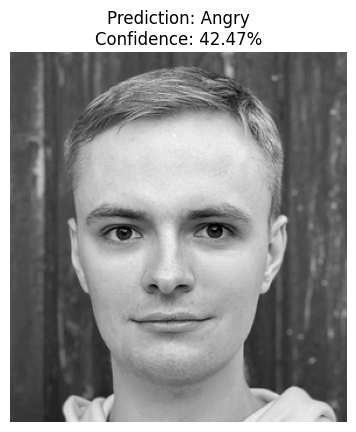

The model predicted the emotion: Angry
Prediction confidence: 42.47%


In [170]:
predictions = loaded_model.predict(final_input)

# Get the predicted class index (the one with the highest probability)
predicted_class_index = np.argmax(predictions)

# Use your emotion_map to get the emotion label
emotion_map = {0: 'Angry', 1: 'Digust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}
predicted_emotion = emotion_map[predicted_class_index]

# Get the confidence score
confidence = np.max(predictions) * 100

plt.imshow(new_image, cmap='gray')
plt.title(f"Prediction: {predicted_emotion}\nConfidence: {confidence:.2f}%")
plt.axis('off')
plt.show()

print(f"The model predicted the emotion: {predicted_emotion}")
print(f"Prediction confidence: {confidence:.2f}%")

## Processing Single or Multiple images for Emotion Detection

Found 1 face(s) in the image.


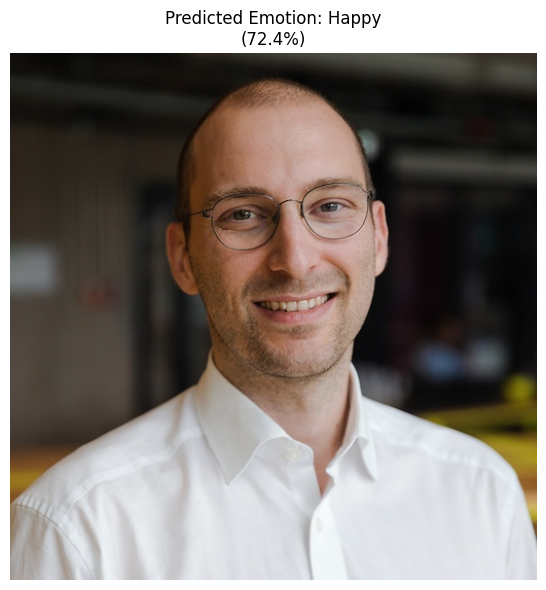

In [42]:
import math

# # Load the model
# model_path = '/content/drive/My Drive/Emotion_model/DeepS_emotion_model.keras'
# loaded_model = load_model(model_path)


# Load the Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Define the emotion map
emotion_map = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}

# Load your multi-face image
image_path = '/content/drive/My Drive/Emotion_model/Sample_Images/Simon.jpeg'
image = cv2.imread(image_path)
# Create a grayscale version for face detection and a color version for display
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

print(f"Found {len(faces)} face(s) in the image.")

# Calculate the grid dimensions for a more square-like layout
num_faces = len(faces)
rows = int(math.ceil(math.sqrt(num_faces)))
cols = int(math.ceil(num_faces / rows))

# Create a figure and axes for the grid
if num_faces == 1:
    fig, ax = plt.subplots(figsize=(6, 6))
    axes = [ax]
else:
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 2.5, rows * 2.5))
    axes = axes.flatten()

# Loop through each detected face
for i, (x, y, w, h) in enumerate(faces):

    # Crop the face region from the original COLOR image for display
    # This is the key part to maintain quality
    color_face_region_display = image[y:y+h, x:x+w]

    # Crop the face region from the GRAYSCALE image for model prediction
    gray_face_region_model = gray_image[y:y+h, x:x+w]

    # Preprocess the cropped face for the model
    resized_face_for_model = cv2.resize(gray_face_region_model, (48, 48))
    reshaped_face = np.expand_dims(resized_face_for_model, axis=-1)
    final_input = np.expand_dims(reshaped_face, axis=0)
    final_input = final_input / 255.0

    # Make a prediction
    predictions = loaded_model.predict(final_input, verbose=0)
    predicted_class_index = np.argmax(predictions)
    predicted_emotion = emotion_map[predicted_class_index]
    confidence = np.max(predictions) * 100

    # Get the correct subplot axis
    ax = axes[i]

    # Conditional display based on the number of faces
    if num_faces == 1:
        # Display the full original image
        ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        ax.set_title(f"Predicted Emotion: {predicted_emotion}\n({confidence:.1f}%)")
        ax.axis('off')
    else:
        # Display the high-quality cropped face for multiple faces
        ax.imshow(cv2.cvtColor(color_face_region_display, cv2.COLOR_BGR2RGB))
        ax.set_title(f"Face {i+1}: {predicted_emotion}\n({confidence:.1f}%)")
        ax.axis('off')

# Hide any unused subplots
for i in range(num_faces, len(axes)):
    axes[i].axis('off')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()